# Interactive Density Profiles

This notebook produces interactive density profiles with a slider widget to vizualize different time instants. It plots the density profiles both in $\rho$ and in R.

In [7]:
%matplotlib notebook

import matplotlib
# matplotlib.use("Agg")
from IPython.core.display import display, HTML
from ipfnpytools.getsig import getsig
import ipfnpytools.aug_read as aug_read
from ipfnpytools.closest import closest
from __future__ import print_function
from ipfnpytools.plot import plots
from warnings import warn
import numpy as np
from ipfnpytools.save_figure import save_figure
from ipfnpytools import rps_dump
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import ipywidgets as widgets

## Parameters

Change the following parameters to fit your needs. After that, run each cell by hitting `Shift + Return`

In [8]:
# Shot number
shot = 37408  

# Choose source between 'afs' and 'dump'
source = 'dump'

# If using a dump file, state its relative path
path = "RPS_dump_xhfs_1m044.37408"  

# Select equilibrium for the rho poloidal transform
equillibrium = 'EQH'                

## Get density profile data

In [9]:
if source == 'dump':
    # Instantiate the ShotFile class with the path to the dump file
    shotfile = rps_dump.ShotFile(path)

    ne_lfs = shotfile("neb_LFS")
    ne_hfs = shotfile("neb_HFS")

    # Time array is equal for LFS and HFS
    time = ne_lfs.time

    # Low-field side
    lfs_signal = ne_lfs.data
    lfs_area = ne_lfs.area.data

    # High-field side
    hfs_signal = ne_hfs.data
    hfs_area = ne_hfs.area.data
    
elif source == 'afs':

    data = aug_read.many_signals(
        diagnostics=(["RPS"] * 2),
        names=['neb_LFS', 'neb_HFS'],
        shots=shot)

    # Time array is equal for LFS and HFS
    time = data.times[0]

    # Low-field side
    lfs_signal = data.signals[0]
    lfs_area = data.areas[0]

    # High-field side
    hfs_signal = data.signals[1]
    hfs_area = data.areas[1]


print("time:", time.shape)
print("lfs_signal:", lfs_signal.shape)
print("lfs_area:", lfs_area.shape)
print("hfs_signal:", hfs_signal.shape)
print("hfs_area:", hfs_area.shape)

time: (11465,)
lfs_signal: (11465, 151)
lfs_area: (11465, 151)
hfs_signal: (11465, 151)
hfs_area: (11465, 151)


## Plotting the profiles in R[m]

<IPython.core.display.Javascript object>


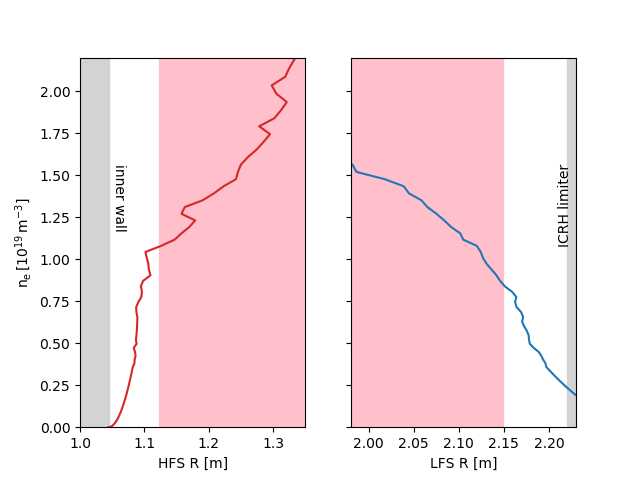

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTEuOTk2ODMyNzk5OTk3NDcxOCwgZGVzY3JpcHRpb249dSdUaW1lOicsIG1heD00LjAwMzAzMjc5OTk5NzQ3MiwgbWluPTHigKY=


In [10]:
rin = getsig(shot, 'GQH', 'Rin')
raus = getsig(shot, 'GQH', 'Raus')

fig1, ax1 = plt.subplots(ncols=2, sharey=True)

hfs_line1, = ax1[0].plot(hfs_area[0], hfs_signal[0]*1e-19, color='C3')

lfs_line1, = ax1[1].plot(lfs_area[0], lfs_signal[0]*1e-19, color='C0')

#labels & text
ax1[0].set_ylabel(r'$\mathrm{n_{e}\,[10^{19}\,m^{-3}]}$')
ax1[0].set_xlabel('HFS R [m]')
ax1[1].set_xlabel('LFS R [m]')
ax1[1].set_ylim(0, 2.2)
ax1[0].text(1.05, 1.5, 'inner wall', rotation=270)
ax1[1].text(2.21, 1.5, 'ICRH limiter', rotation=90, ha='left')

#Inner vessel wall
ax1[0].axvspan(1.0, 1.045, color='#D3D3D3')
#ICRH limiter
ax1[1].axvspan(2.22, 2.23, color='#D3D3D3')

#Readjust X axis
ax1[0].set_xlim(1.0, 1.35)
ax1[1].set_xlim(1.98, 2.23)

#Separatrices
rinr = rin.data[closest(rin.time, time[0])]
ax1[0].axvspan(rinr, 1.35, color='#FFC0CB')

rausr = raus.data[closest(raus.time, time[0])]
ax1[1].axvspan(1.98, rausr, color='#FFC0CB')

time_slider = widgets.FloatSlider(
    value=time[0],
    min=time[0],
    max=time[-1],
    step=time[1]-time[0],
    description='Time:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.6f',
)

def update_slider1(t):
    time_index = closest(time, t)
    lfs_line1.set_xdata(lfs_area[time_index])
    hfs_line1.set_xdata(hfs_area[time_index])
    fig1.canvas.draw_idle()

widgets.interact(update_slider1, t=time_slider);

## Change coordinates to $\rho$

In [11]:
import dd #To read 
import kk_abock
import numpy as np
from ipfnpytools.trz_to_rhop import trz_to_rhop

In [12]:
# Set the antenna Z
zl = 0.14
zh = 0.07

# Walls
inner_wall = 1.045
outer_wall = 2.22

inner_wall_rho = trz_to_rhop(3, inner_wall, zh, shot, eq=equillibrium)
outer_wall_rho = trz_to_rhop(3, outer_wall, zl, shot, eq=equillibrium)
rhol = trz_to_rhop(time, lfs_area, np.ones_like(lfs_area)*zl, shot, eq=equillibrium)
rhoh = trz_to_rhop(time, hfs_area, np.ones_like(hfs_area)*zh, shot, eq=equillibrium)

trz_to_rhop:1/1
trz_to_rhop:1/1
trz_to_rhop:11465/11465
trz_to_rhop:11465/11465


## Plotting profiles in $\rho$

<IPython.core.display.Javascript object>


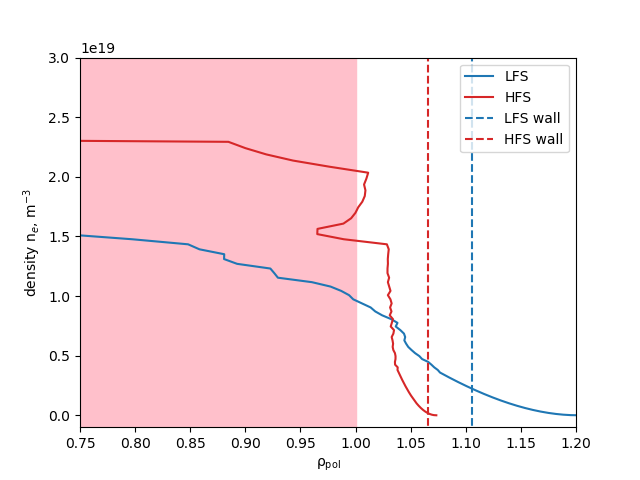

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTMuMTc1MTEsIGRlc2NyaXB0aW9uPXUnVGltZTonLCBtYXg9NC4wMDMwMzI3OTk5OTc0NzIsIG1pbj0xLjk5NjgzMjc5OTnigKY=


In [6]:
fig2 = plt.figure()
ax2 = plt.subplot(111)
lfs_line2, = ax2.plot(rhol[0], lfs_signal[0]*1e-19,'C0',label='LFS')
hfs_line2, = ax2.plot(rhoh[0], hfs_signal[0]*1e-19,'C3',label='HFS')
ax2.axvspan(0.0, 1.0, color='#FFC0CB')

ax2.set_xlim(0.75, 1.2)
ax2.set_ylim(-1e18, 3e19)

ax2.set_xlabel(r'$\mathrm{\rho_{pol}}$')
ax2.set_ylabel(r'$\mathrm{n_{e}\,[10^{19}\,m^{-3}]}$')

ax2.plot(2*[outer_wall_rho], [-1e20, 1e20],'--C0', label='LFS wall')
ax2.plot(2*[inner_wall_rho], [-1e20, 1e20],'--C3', label='HFS wall')

ax2.legend()

def update_slider(t):
    time_index = closest(time, t)
    lfs_line2.set_xdata(rhol[time_index])
    hfs_line2.set_xdata(rhoh[time_index])
    fig2.canvas.draw_idle()

# plt.show()
widgets.interact(update_slider, t=time_slider);
# save_figure(name="../../"+("phd-logbooks/analysis/%d/%d_rho_%.1f"%(shot, shot, center)).replace('.', 's', 1))